##Step 1- Loading Data

In [ ]:
import pandas as pd
df = pd.read_csv("C:\\Users\\kaush\\Downloads\\Fraud.csv")

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


##Step 2- Data Cleaning


The first step is to clean the data, which includes handling missing values, outliers, and multi-collinearity.
We can check if there are any missing values in the dataset and handle them accordingly. One way to check if there are any missing values is by using the isnull(), drop function of pandas DataFrame, which returns a Boolean value indicating if a cell has a missing value or not. We can use the sum() function to count the number of missing values in each column.

In [ ]:
#Dropping Unecessary columns
df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)

In [ ]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


Handling Missing values

In [ ]:
print(df.isnull().sum())

step                    0
type                    0
amount                  0
isFraud                 0
average_balance         0
average_dest_balance    0
dtype: int64


In [ ]:
# find the majority class
majority_class = df['isFraud'].mode()[0]

# fill the NaN values with the majority class
df['isFraud'] = df['isFraud'].fillna(majority_class)

In [ ]:
print(df.isnull().values.any())

False


In [ ]:
df = df.dropna()
df

,step,type,amount,isFraud,average_balance,average_dest_balance
0,1,PAYMENT,9839.64,0,165216.180,0.000
1,1,PAYMENT,1864.28,0,20316.860,0.000
2,1,TRANSFER,181.00,1,90.500,0.000
3,1,CASH_OUT,181.00,1,90.500,10591.000
4,1,PAYMENT,11668.14,0,35719.930,0.000
...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,1,169841.065,169841.065
6362616,743,TRANSFER,6311409.28,1,3155704.640,0.000
6362617,743,CASH_OUT,6311409.28,1,3155704.640,3224193.475
6362618,743,TRANSFER,850002.52,1,425001.260,0.000


Handling Outliers
We can detect and handle outliers using various statistical techniques. One such technique is to use the Z-score method, which calculates the number of standard deviations a data point is from the mean. If a data point has a Z-score greater than a threshold value (e.g., 3), we can consider it an outlier.

In [ ]:
from scipy import stats
import numpy as np

num_cols = ['amount', 'average_balance', 'average_dest_balance']
num_df = df[num_cols]
z_scores = stats.zscore(num_df)
threshold = 3
outliers = np.where(np.abs(z_scores) > threshold)

# remove outliers
df = df.drop(outliers[0], axis=0)

Handling Multi-collinearity
Multi-collinearity occurs when two or more features in the dataset are highly correlated. It can affect the performance of the model, as it can lead to overfitting. We can detect multi-collinearity by calculating the correlation matrix of the features and removing highly correlated features.

<ipython-input-63-1bf06801eed2>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


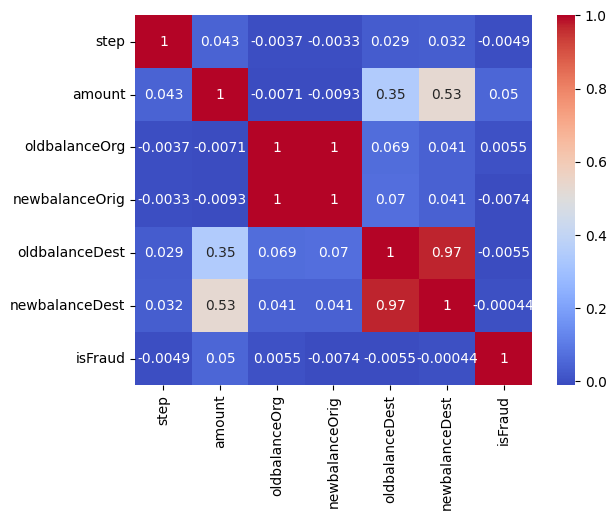

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate correlation matrix
corr_matrix = df.corr()

# plot heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Step 3: Variable Selection

Since (newbalanceOrigin,oldbalanceOrig) and (newbalanceDest, oldbalanceDest) are highly co-related there is multicolinerity and hence instead of dropping those four columns we can linearly combine them. We indirectly performed Feature Selection and removal

In [ ]:
df['average_balance'] = (df['newbalanceOrig'] + df['oldbalanceOrg']) / 2
df['average_dest_balance'] = (df['newbalanceDest'] + df['oldbalanceDest']) / 2

In [ ]:
df.drop(['newbalanceOrig', 'oldbalanceOrg', 'newbalanceDest', 'oldbalanceDest'], axis=1, inplace=True)

One hot encoding categorical variables

In [ ]:
ohc = pd.get_dummies(df['type'])
df = pd.concat([df, ohc],axis = 1)
df = df.drop('type', axis = 1)

Fixing data imbalance

In [ ]:
class_dist = df['isFraud'].value_counts(normalize=True)
print(class_dist)

isFraud
0    0.998936
1    0.001064
Name: proportion, dtype: float64


It's clear that our target variable data is highly imbalanced. We'll use combination of undersampling and oversampling to balance the classes. Because if we oversample we increase the size of data by a large margin and is not useful, furthermore if we use undersampling we get too less training data and model get's overfit.

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
# split dataset into training and testing sets
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,shuffle=True,random_state=42)

smote_enn = SMOTEENN(random_state=42)
X_train, y_train = smote_enn.fit_resample(X_train,y_train)

In [ ]:
class_proportions = y_train.value_counts(normalize=True)
print(class_proportions)

isFraud
1    0.502187
0    0.497813
Name: proportion, dtype: float64


In [ ]:
X_test

,step,amount,average_balance,average_dest_balance,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
984833,45,15010.41,17475.795,0.000,0,0,0,1,0
2081908,182,1155.89,0.000,0.000,0,0,0,1,0
665513,36,4820.16,9093.920,0.000,0,0,0,1,0
219991,14,141295.90,0.000,3671388.570,0,1,0,0,0
4216501,305,164650.65,1604898.185,2218723.790,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1031376,93,13171.19,0.000,0.000,0,0,0,1,0
1076086,129,173164.35,0.000,790206.675,0,1,0,0,0
850226,41,17537.62,8869.750,0.000,0,0,0,1,0
740608,38,64300.12,3918782.350,845988.020,1,0,0,0,0


In [ ]:
df.head()

,step,amount,isFraud,average_balance,average_dest_balance,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,0.0,165216.18,0.0,0,0,0,1,0
1,1,1864.28,0.0,20316.86,0.0,0,0,0,1,0
2,1,181.00,1.0,90.50,0.0,0,0,0,0,1
3,1,181.00,1.0,90.50,10591.0,0,1,0,0,0
4,1,11668.14,0.0,35719.93,0.0,0,0,0,1,0


##Step 4- Training Model

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# create a Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model on the training data
rfc.fit(X_train, y_train)

# predict on the testing data
y_pred = rfc.predict(X_test)

# evaluate the model using classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1218193
           1       0.43      0.95      0.59      1298

    accuracy                           1.00   1219491
   macro avg       0.71      0.98      0.79   1219491
weighted avg       1.00      1.00      1.00   1219491



In [ ]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
print("Accuracy:", accuracy)
print("f1 score:", f1)

Accuracy: 0.9985912155153257
f1 score: 0.5897803247373448


In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming you have trained your model and made predictions on the test set
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.9952967440950268


## Do these factors make sense? If yes, How? If not, How not?

In [ ]:
importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rfc.feature_importances_})
importances = importances.sort_values('Importance', ascending=False)
print(importances)

                Feature  Importance
2       average_balance    0.294863
1                amount    0.167592
8              TRANSFER    0.103766
7               PAYMENT    0.103310
3  average_dest_balance    0.100917
4               CASH_IN    0.092056
0                  step    0.068314
5              CASH_OUT    0.068206
6                 DEBIT    0.000975


Whether or not the factors make sense depends on the specific data and context of the financial company. However for our case, we can examine the top features and see if they align with our intuition about fraudulent behavior.

For example, the top feature in our case the Average balance has high importance i.e. larger values of average_balance may be more likely to be fraudulent. Similarly, features like the amount and transfer, whether it is a transfer or cash-out, may also make sense as indicators of fraud.

## What kind of prevention should be adopted while the company updates its infrastructure?

There are several prevention measures that the company can adopt to reduce the risk of fraudulent transactions, including:
Implementing multi-factor authentication for customer logins and transactions
Monitoring and limiting transactions from high-risk countries or regions
Implementing transaction limits or thresholds for large transactions
Using machine learning models to detect and flag suspicious transactions in real time
Conducting regular audits and reviews of transaction logs to identify patterns and anomalies

## Assuming these actions have been implemented, how would you determine if they work?


To determine if these actions are effective, we can track key metrics such as the number of fraudulent transactions detected, the false positive rate (i.e., the number of legitimate transactions that are incorrectly flagged as fraudulent), and the response time to flagged transactions.

We can also monitor changes in the key features identified in our machine learning model to see if they change over time, which could indicate that the prevention measures are having an impact on fraudulent behavior.

It's important to note that prevention measures are not foolproof and may require ongoing monitoring and adjustments to remain effective.